In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd



In [44]:
df=pd.read_csv('brca_cancer (1).csv')

In [45]:
df.head()

,Unnamed: 0,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded,class
0,4,ENSG00000000003.15,TSPAN6,protein_coding,5175,2582,2594,58.4397,16.4625,16.0650,0
1,5,ENSG00000000005.6,TNMD,protein_coding,85,52,33,2.9499,0.8310,0.8109,0
2,6,ENSG00000000419.13,DPM1,protein_coding,2406,1194,1212,102.1078,28.7639,28.0692,0
3,7,ENSG00000000457.14,SCYL3,protein_coding,2222,1629,1631,16.5362,4.6583,4.5458,0
4,8,ENSG00000000460.17,C1orf112,protein_coding,476,808,782,4.0842,1.1505,1.1227,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121320 entries, 0 to 121319
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          121320 non-null  int64  
 1   gene_id             121320 non-null  object 
 2   gene_name           121320 non-null  object 
 3   gene_type           121320 non-null  object 
 4   unstranded          121320 non-null  int64  
 5   stranded_first      121320 non-null  int64  
 6   stranded_second     121320 non-null  int64  
 7   tpm_unstranded      121320 non-null  float64
 8   fpkm_unstranded     121320 non-null  float64
 9   fpkm_uq_unstranded  121320 non-null  float64
 10  class               121320 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.2+ MB


In [47]:
dfe=df.loc[:,['gene_name','tpm_unstranded','class']]

In [48]:
dfe.head()

,gene_name,tpm_unstranded,class
0,TSPAN6,58.4397,0
1,TNMD,2.9499,0
2,DPM1,102.1078,0
3,SCYL3,16.5362,0
4,C1orf112,4.0842,0


In [49]:
len(dfe['gene_name'].unique()) # Total number of unique genes in an organ

59427

In [50]:
dfe['gene_name'].value_counts()

gene_name
Y_RNA          1512
Metazoa_SRP     340
U3              100
U6               66
SNORA70          54
               ... 
CYS1              2
PLPP6             2
KLRC2             2
KLRC3             2
AP006621.6        2
Name: count, Length: 59427, dtype: int64

In [51]:
dfe[dfe['gene_name']=='PIK3CA']  # PIK3CA Gene

,gene_name,tpm_unstranded,class
5204,PIK3CA,10.6744,0
65864,PIK3CA,6.7967,1


In [52]:
dfe[dfe['gene_name']=='TP53']

,gene_name,tpm_unstranded,class
8124,TP53,55.8894,0
68784,TP53,42.4685,1


In [53]:
dfe[dfe['gene_name']=='BRCA1']

,gene_name,tpm_unstranded,class
310,BRCA1,4.8549,0
60970,BRCA1,3.0269,1


In [54]:
dfe[dfe['gene_name']=='NF1']

,gene_name,tpm_unstranded,class
17196,NF1,19.8343,0
77856,NF1,7.0352,1


In [55]:
dfe

,gene_name,tpm_unstranded,class
0,TSPAN6,58.4397,0
1,TNMD,2.9499,0
2,DPM1,102.1078,0
3,SCYL3,16.5362,0
4,C1orf112,4.0842,0
...,...,...,...
121315,AC008763.4,0.0000,1
121316,AL592295.6,6.7192,1
121317,AC006486.3,0.0000,1
121318,AL391628.1,0.0224,1


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_gene_names = encoder.fit_transform(dfe['gene_name'])
dfe['gene_name'] = encoded_gene_names
dfe

,gene_name,tpm_unstranded,class
0,56562,58.4397,0
1,55779,2.9499,0
2,26531,102.1078,0
3,51532,16.5362,0
4,22695,4.0842,0
...,...,...,...
121315,2395,0.0000,1
121316,18889,6.7192,1
121317,1468,0.0000,1
121318,17971,0.0224,1


# ***Generate Population & Fitness Function***

In [57]:

def generate(dfe,start_index,end_index,filtered_genes):
    selected_genes = filtered_genes['gene_name'].unique()[start_index:end_index]
    selected_genes_df = filtered_genes[filtered_genes['gene_name'].isin(selected_genes)]
    return selected_genes_df
def calculate_accuracy(selected_genes_df):
    y = selected_genes_df['class']
    X = selected_genes_df.drop(['class'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_predictions = dtree.predict(X_test)
    accuracy = accuracy_score(y_test, y_predictions)
    return accuracy,y_predictions

In [58]:
filtered_genes = dfe.groupby('gene_name').filter(lambda x: len(x) == 2 and (x['tpm_unstranded'] != 0).all())
start_index = 0
end_index = 29
selected_genes_threshold = None
for i in range(2022):
    selected_genes_df = generate(dfe, start_index, end_index, filtered_genes)
    accuracy,y_predictions = calculate_accuracy(selected_genes_df)
    if accuracy >= 0.85:
        print(f"Accuracy for iteration {i+1}:\n{accuracy}")
        selected_genes_threshold = selected_genes_df
        break
    print(f"Accuracy for iteration {i+1}:\n{accuracy}")
    start_index += 30
    end_index += 30



Accuracy for iteration 1:
0.3888888888888889
Accuracy for iteration 2:
0.6666666666666666
Accuracy for iteration 3:
0.5555555555555556
Accuracy for iteration 4:
0.3888888888888889
Accuracy for iteration 5:
0.3333333333333333
Accuracy for iteration 6:
0.3333333333333333
Accuracy for iteration 7:
0.3888888888888889
Accuracy for iteration 8:
0.5555555555555556
Accuracy for iteration 9:
0.5
Accuracy for iteration 10:
0.5555555555555556
Accuracy for iteration 11:
0.4444444444444444
Accuracy for iteration 12:
0.5
Accuracy for iteration 13:
0.5
Accuracy for iteration 14:
0.3888888888888889
Accuracy for iteration 15:
0.4444444444444444
Accuracy for iteration 16:
0.4444444444444444
Accuracy for iteration 17:
0.4444444444444444
Accuracy for iteration 18:
0.5
Accuracy for iteration 19:
0.3333333333333333
Accuracy for iteration 20:
0.5
Accuracy for iteration 21:
0.5555555555555556
Accuracy for iteration 22:
0.4444444444444444
Accuracy for iteration 23:
0.6111111111111112
Accuracy for iteration 24:

# ***Selected OFF Springs with Highest Accuracy ***

In [59]:
if selected_genes_threshold is not None:
    print("Selected genes with accuracy >= 0.85:\n", selected_genes_threshold)
else:
    print("Accuracy threshold not met for any iteration.")


Selected genes with accuracy >= 0.85:
        gene_name  tpm_unstranded  class
21530      32018          3.8890      0
21531      32019          0.1271      0
21532      31996         77.8651      0
21535      31964          0.5854      0
21536      31955        228.5107      0
21538      31956        135.0441      0
21542      19806          0.1885      0
21544      31960          0.8131      0
21547      56282         30.5090      0
21552      56290          1.0005      0
21553      56300          0.1181      0
21554      56299          0.7662      0
21556      56294          0.0745      0
21557      56293          0.3816      0
21559      56234          0.6387      0
21561      56225          0.6866      0
21563      56243          0.3871      0
21565      56251          1.3134      0
21567      56189          0.2814      0
21568      56237          0.6247      0
21569      56238          0.5281      0
21570      56231          0.1464      0
21571      56246          0.1307      0
2

# ***Final Result***

In [60]:
def print_classification_report(selected_genes_df):
    y = selected_genes_df['class']
    X = selected_genes_df.drop(['class'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
print_classification_report(selected_genes_threshold)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.86      0.86      0.86         7

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



# ***`Confusion MAtrix`***

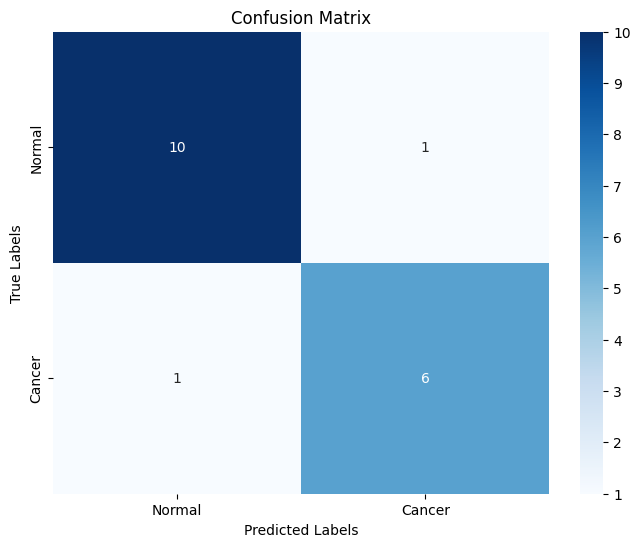

In [61]:
def confusion_summary(selected_genes_df):
    # Extract features and target variable
    y = selected_genes_df['class']
    X = selected_genes_df.drop(['class'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
confusion_summary(selected_genes_threshold)
